In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout

### 📖Load the data

In [2]:
df = pd.read_csv("./Data/rgs_data.csv")
df

,date,temp_mean_all,surface_temp_mean_all,soil_temp_10_mean_all,soil_temp_20_mean_all,soil_temp_50_mean_all,relhum_mean_all,abshum_mean_all,dew_point_temp_mean_all,windspeed_mean,...,precipitation_sum_550,wind_u_mean,wind_v_mean,rgs_roof_global_radiation_short_wave_mean,rgs_roof_diffuse_radiation_short_wave_mean,rgs_roof_diffuse_radiation_short_wave_corrected_mean,rgs_roof_global_radiation_long_wave_mean,rgs_roof_direct_radiation_mean,rgs_roof_direct_rad_perpendicular_mean,rgs_roof_sunshine_duration_sum
0,2019-01-01,6.264583,5.325000,6.127083,6.171528,6.107639,88.918750,6.596082,4.591667,3.390972,...,2.9,3.382959,-0.232985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,3.376389,1.965278,4.227083,4.904861,6.145833,70.394444,4.287565,-1.534028,2.787500,...,0.1,2.183675,-1.732547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,2.799306,2.163194,3.220833,3.854861,5.781944,88.859028,5.219127,1.196528,1.874306,...,0.1,1.685786,-0.819236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,2.644444,2.236111,3.382639,3.856250,5.485417,96.376389,5.595564,2.187500,2.327778,...,6.1,2.325536,0.102128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,5.558333,5.254167,4.527778,4.543750,5.414583,97.266667,6.856569,5.226389,3.790972,...,2.7,3.709111,-0.783558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,2022-11-18,7.761111,6.912500,8.678472,9.168056,10.504167,90.742361,7.374350,6.368056,1.098611,...,1.2,-0.037469,1.097972,37.844444,30.694444,32.207003,318.273611,5.637442,20.506590,70.0
1418,2022-11-19,0.038889,-0.264583,6.577083,7.806944,10.261806,84.845139,4.149819,-2.209028,1.766667,...,0.0,-1.705971,-0.459102,28.613194,26.804167,27.563441,281.538194,1.049753,6.706130,20.0
1419,2022-11-20,1.259722,1.144444,4.463194,5.716667,9.453472,92.398611,4.946537,0.188889,1.044444,...,5.4,-0.276910,1.007067,32.093056,24.528472,25.577710,301.006944,6.515346,31.233515,92.0
1420,2022-11-21,4.140972,3.739583,5.735417,6.322222,8.847917,92.990278,5.964626,3.127778,0.981944,...,0.1,-0.875378,-0.444891,23.668750,21.395833,22.284979,313.812500,1.383771,5.615352,14.0


In [3]:
df.dtypes

date                                                     object
temp_mean_all                                           float64
surface_temp_mean_all                                   float64
soil_temp_10_mean_all                                   float64
soil_temp_20_mean_all                                   float64
soil_temp_50_mean_all                                   float64
relhum_mean_all                                         float64
abshum_mean_all                                         float64
dew_point_temp_mean_all                                 float64
windspeed_mean                                          float64
windspeed_az_mean                                       float64
windspeed_el_mean                                       float64
winddirection_mean                                      float64
winddirection_az_mean_angle                             float64
winddirection_el_mean_angle                             float64
precipitation_sum_all                   

In [4]:
df["date"] = pd.to_datetime(df["date"])
df["doi"] = df["date"].dt.dayofyear
df

,date,temp_mean_all,surface_temp_mean_all,soil_temp_10_mean_all,soil_temp_20_mean_all,soil_temp_50_mean_all,relhum_mean_all,abshum_mean_all,dew_point_temp_mean_all,windspeed_mean,...,wind_u_mean,wind_v_mean,rgs_roof_global_radiation_short_wave_mean,rgs_roof_diffuse_radiation_short_wave_mean,rgs_roof_diffuse_radiation_short_wave_corrected_mean,rgs_roof_global_radiation_long_wave_mean,rgs_roof_direct_radiation_mean,rgs_roof_direct_rad_perpendicular_mean,rgs_roof_sunshine_duration_sum,doi
0,2019-01-01,6.264583,5.325000,6.127083,6.171528,6.107639,88.918750,6.596082,4.591667,3.390972,...,3.382959,-0.232985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2019-01-02,3.376389,1.965278,4.227083,4.904861,6.145833,70.394444,4.287565,-1.534028,2.787500,...,2.183675,-1.732547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2019-01-03,2.799306,2.163194,3.220833,3.854861,5.781944,88.859028,5.219127,1.196528,1.874306,...,1.685786,-0.819236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,2019-01-04,2.644444,2.236111,3.382639,3.856250,5.485417,96.376389,5.595564,2.187500,2.327778,...,2.325536,0.102128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,2019-01-05,5.558333,5.254167,4.527778,4.543750,5.414583,97.266667,6.856569,5.226389,3.790972,...,3.709111,-0.783558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,2022-11-18,7.761111,6.912500,8.678472,9.168056,10.504167,90.742361,7.374350,6.368056,1.098611,...,-0.037469,1.097972,37.844444,30.694444,32.207003,318.273611,5.637442,20.506590,70.0,322
1418,2022-11-19,0.038889,-0.264583,6.577083,7.806944,10.261806,84.845139,4.149819,-2.209028,1.766667,...,-1.705971,-0.459102,28.613194,26.804167,27.563441,281.538194,1.049753,6.706130,20.0,323
1419,2022-11-20,1.259722,1.144444,4.463194,5.716667,9.453472,92.398611,4.946537,0.188889,1.044444,...,-0.276910,1.007067,32.093056,24.528472,25.577710,301.006944,6.515346,31.233515,92.0,324
1420,2022-11-21,4.140972,3.739583,5.735417,6.322222,8.847917,92.990278,5.964626,3.127778,0.981944,...,-0.875378,-0.444891,23.668750,21.395833,22.284979,313.812500,1.383771,5.615352,14.0,325


In [5]:
pd.Series(df.columns)

0                                                  date
1                                         temp_mean_all
2                                 surface_temp_mean_all
3                                 soil_temp_10_mean_all
4                                 soil_temp_20_mean_all
5                                 soil_temp_50_mean_all
6                                       relhum_mean_all
7                                       abshum_mean_all
8                               dew_point_temp_mean_all
9                                        windspeed_mean
10                                    windspeed_az_mean
11                                    windspeed_el_mean
12                                   winddirection_mean
13                          winddirection_az_mean_angle
14                          winddirection_el_mean_angle
15                                precipitation_sum_all
16                                    pressure_mean_all
17                            pressure_reduced_m

In [6]:
training_df = df.iloc[:,[1,2,6,9,15,16,18,19,39]]
training_df.isnull().sum()

temp_mean_all                       0
surface_temp_mean_all               0
relhum_mean_all                     0
windspeed_mean                      0
precipitation_sum_all               0
pressure_mean_all                   0
global_radiation_short_wave_mean    0
global_radiation_long_wave_mean     0
doi                                 0
dtype: int64

In [7]:
training_df.describe()

,temp_mean_all,surface_temp_mean_all,relhum_mean_all,windspeed_mean,precipitation_sum_all,pressure_mean_all,global_radiation_short_wave_mean,global_radiation_long_wave_mean,doi
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,11.143145,11.311368,76.922063,1.653890,2.157032,1000.735010,122.596885,329.438953,178.658228
std,6.378455,7.265371,12.480160,0.767026,5.514619,9.533405,93.804754,34.258640,103.337929
min,-8.857639,-10.308333,28.013194,0.470833,0.000000,963.388194,-5.520833,206.945165,1.000000
25%,6.245833,5.555556,68.132292,1.109943,0.000000,994.980382,35.522569,307.073496,89.250000
50%,10.933681,10.872917,78.438889,1.478819,0.100000,1001.496875,107.194444,329.805389,178.000000
75%,16.171528,17.045833,86.905729,1.962153,2.000000,1006.982465,195.203125,355.740659,267.000000
max,29.908333,31.823611,98.843056,5.988194,92.900000,1030.550000,346.951389,416.611021,366.000000


### 📖Scale the data

In [8]:
scaler = StandardScaler()
scaler = scaler.fit(training_df)
scaled_train_df = scaler.transform(training_df)

In [9]:
pd.DataFrame(scaled_train_df).describe()

,0,1,2,3,4,5,6,7,8
count,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03
mean,8.994212e-17,9.493890e-17,2.198585e-16,-3.547717e-16,-5.371543e-17,1.828823e-15,2.098649e-16,3.497749e-16,5.996141e-17
std,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00
min,-3.136782e+00,-2.976766e+00,-3.920308e+00,-1.542937e+00,-3.912856e-01,-3.918847e+00,-1.366272e+00,-3.576817e+00,-1.719802e+00
25%,-7.680598e-01,-7.925043e-01,-7.045474e-01,-7.094124e-01,-3.912856e-01,-6.038402e-01,-9.285771e-01,-6.530710e-01,-8.655068e-01
50%,-3.285098e-02,-6.036938e-02,1.215817e-01,-2.283257e-01,-3.731456e-01,7.994338e-02,-1.642546e-01,1.069991e-02,-6.371904e-03
75%,7.886159e-01,7.895650e-01,8.002444e-01,4.020354e-01,-2.848567e-02,6.555530e-01,7.742868e-01,7.680094e-01,8.551831e-01
max,2.942999e+00,2.824282e+00,1.757085e+00,5.652781e+00,1.646077e+01,3.128523e+00,2.392559e+00,2.545423e+00,1.813542e+00


### 📖Generate X and Y data

In [10]:
x_train = []
y_train = []

n_future = 2 #Number of days we want to predict into the future
n_past = 7 #Number of past days we want to use to predict the future

for i in range (n_past, len(scaled_train_df) - n_future + 1, n_future):
    #ersteinmal nur mit print zeigen,damit klar ist, was hier passiert > Nummern von 15
    print(i - n_past, i)

0 7
2 9
4 11
6 13
8 15
10 17
12 19
14 21
16 23
18 25
20 27
22 29
24 31
26 33
28 35
30 37
32 39
34 41
36 43
38 45
40 47
42 49
44 51
46 53
48 55
50 57
52 59
54 61
56 63
58 65
60 67
62 69
64 71
66 73
68 75
70 77
72 79
74 81
76 83
78 85
80 87
82 89
84 91
86 93
88 95
90 97
92 99
94 101
96 103
98 105
100 107
102 109
104 111
106 113
108 115
110 117
112 119
114 121
116 123
118 125
120 127
122 129
124 131
126 133
128 135
130 137
132 139
134 141
136 143
138 145
140 147
142 149
144 151
146 153
148 155
150 157
152 159
154 161
156 163
158 165
160 167
162 169
164 171
166 173
168 175
170 177
172 179
174 181
176 183
178 185
180 187
182 189
184 191
186 193
188 195
190 197
192 199
194 201
196 203
198 205
200 207
202 209
204 211
206 213
208 215
210 217
212 219
214 221
216 223
218 225
220 227
222 229
224 231
226 233
228 235
230 237
232 239
234 241
236 243
238 245
240 247
242 249
244 251
246 253
248 255
250 257
252 259
254 261
256 263
258 265
260 267
262 269
264 271
266 273
268 275
270 277
272 279
274 281


In [11]:
x_train = []
y_train = []

n_future = 2 #Number of days we want to predict into the future
n_past = 7 #Number of past days we want to use to predict the future

for i in range (n_past, len(scaled_train_df) - n_future + 1, n_future):
    #ersteinmal nur mit print zeigen,damit klar ist, was hier passiert > Nummern von 15

    
    
    #Nehme i als ausgangspunkt, gehe die Anzahl an past Tagen in der Tabelle zurück um den aktuellen Startwert der Reihe zu
    #bekommen und selektiere alle Werte bis i
    print(i - n_past, i)
    x_train.append(scaled_train_df[i - n_past : i])
    #print(scaled_train_df[i - n_past : i])
    
    #Selectieren den dazugehörigen Y Wertes, welcher vorhergesat wird. Wir nehmen hier nicht nur i, damit wir auch mehr tage in die Zukunft gehen können
    print(i,  i+n_future)
    
    print('-----------')
    #Select the y Value and only consider the first element (as this stores the temperature in our case)
    y_train.append(scaled_train_df[i : i+n_future, 0])#i+n_future-1 : i+n_future, 0
    #print(scaled_train_df[i : i+n_future, 0])

0 7
7 9
-----------
2 9
9 11
-----------
4 11
11 13
-----------
6 13
13 15
-----------
8 15
15 17
-----------
10 17
17 19
-----------
12 19
19 21
-----------
14 21
21 23
-----------
16 23
23 25
-----------
18 25
25 27
-----------
20 27
27 29
-----------
22 29
29 31
-----------
24 31
31 33
-----------
26 33
33 35
-----------
28 35
35 37
-----------
30 37
37 39
-----------
32 39
39 41
-----------
34 41
41 43
-----------
36 43
43 45
-----------
38 45
45 47
-----------
40 47
47 49
-----------
42 49
49 51
-----------
44 51
51 53
-----------
46 53
53 55
-----------
48 55
55 57
-----------
50 57
57 59
-----------
52 59
59 61
-----------
54 61
61 63
-----------
56 63
63 65
-----------
58 65
65 67
-----------
60 67
67 69
-----------
62 69
69 71
-----------
64 71
71 73
-----------
66 73
73 75
-----------
68 75
75 77
-----------
70 77
77 79
-----------
72 79
79 81
-----------
74 81
81 83
-----------
76 83
83 85
-----------
78 85
85 87
-----------
80 87
87 89
-----------
82 89
89 91
-----------
84

In [12]:
#Turn into Array
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train.shape)
print(y_train.shape)

(707, 7, 9)
(707, 2)


### 📖Built a very simple LSTM Model

In [13]:
model = Sequential()
model.add(LSTM(1, input_shape=(x_train.shape[1], x_train.shape[2])))

opt = keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer = opt, loss="mse")
model.summary()

history = model.fit(x_train, y_train, epochs=30, batch_size=16, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 44        
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
40/40 [==============================] - 2s 13ms/step - loss: 0.7397 - val_loss: 0.3913
Epoch 2/30
40/40 [==============================] - 0s 3ms/step - loss: 0.6726 - val_loss: 0.3709
Epoch 3/30
40/40 [==============================] - 0s 3ms/step - loss: 0.6227 - val_loss: 0.3615
Epoch 4/30
40/40 [==============================] - 0s 3ms/step - loss: 0.5820 - val_loss: 0.3686
Epoch 5/30
40/40 [==============================] - 0s 3ms/step - loss: 0.5468 - val_loss: 0.3837
Epoch 6/30
40/40 [==============================] - 0s 3ms/step - loss: 0.5130 - val_loss: 0.3997

### 📖Built a better LSTM model
If we want to concatenate several LSTM layer, we need to forward a sequence of information, as the next LSTM layer also expects a sequence of data. Previous LSTM layer then use "many to many" LSTM cells

In [14]:
model = Sequential()
model.add(LSTM(32, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

opt = keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer = opt, loss="mse")
model.summary()

history = model.fit(x_train, y_train, epochs=15, batch_size=16, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 7, 32)             5376      
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 30,338
Trainable params: 30,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
40/40 [==============================] - 3s 21ms/step - loss: 0.4180 - val_loss: 0.2649
Epoch 2/15
40/40 [==============================] - 0s 5ms/step - loss: 0.2762 - va

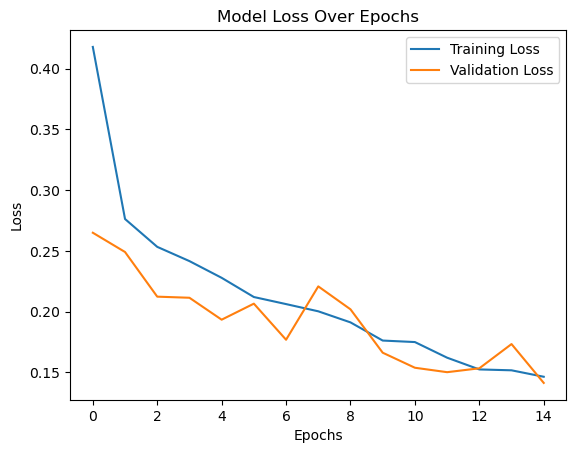

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### 📖Deploy the model to predict the whole training dataset
Sure, a test dataset would be better, but lets just take the training dataset

In [16]:
forecast = model.predict(x_train)
print(forecast.shape)
forecast

23/23 [==============================] - 1s 2ms/step
(707, 2)


array([[-1.1798046 , -1.2787688 ],
       [-1.5494158 , -1.5288302 ],
       [-1.1489334 , -1.2710435 ],
       ...,
       [ 0.14544472,  0.00641684],
       [-0.3468357 , -0.38693887],
       [-1.6225464 , -1.3551753 ]], dtype=float32)

### 📖Flatten the forecast
Is just needed if we predicted more than one value at each time step

In [19]:
forecast = forecast.flatten()
forecast = np.expand_dims(forecast, axis=1)
print(forecast.shape)

(1414, 1)


### 📖Postprocess the data

In [20]:
#Undo the scaling with a little trick
#The problem, the scaler was used on 8 columns, now we only have 1

forecast_copy = np.repeat(forecast, scaled_train_df.shape[1], axis=1)
print(forecast_copy.shape)
y_pred = scaler.inverse_transform(forecast_copy)[:,:1]
y_pred

(1414, 9)


array([[3.6204612],
       [2.9894445],
       [1.2637414],
       ...,
       [8.675941 ],
       [0.7974451],
       [2.502261 ]], dtype=float32)

### 📖Create a Dataframe that will store real and predicted values

In [21]:
#Load the original df, but skip the first n_past entries, as they were the initial values to make the first prediction
real = df[["date", "temp_mean_all"]][n_past:].copy().reset_index(drop=True)
real

,date,temp_mean_all
0,2019-01-08,5.875000
1,2019-01-09,2.915278
2,2019-01-10,0.534722
3,2019-01-11,3.553472
4,2019-01-12,5.618750
...,...,...
1410,2022-11-18,7.761111
1411,2022-11-19,0.038889
1412,2022-11-20,1.259722
1413,2022-11-21,4.140972


In [22]:
pred = pd.DataFrame(y_pred, columns=["Predicted"]).reset_index(drop=True)
pred

,Predicted
0,3.620461
1,2.989444
2,1.263741
3,1.395000
4,3.817302
...,...
1409,11.184060
1410,8.931647
1411,8.675941
1412,0.797445


In [23]:
new_df = pd.concat([real, pred], axis=1).set_index('date')
new_df

,temp_mean_all,Predicted
date,,
2019-01-08,5.875000,3.620461
2019-01-09,2.915278,2.989444
2019-01-10,0.534722,1.263741
2019-01-11,3.553472,1.395000
2019-01-12,5.618750,3.817302
...,...,...
2022-11-18,7.761111,8.931647
2022-11-19,0.038889,8.675941
2022-11-20,1.259722,0.797445


### 📖Plot the data

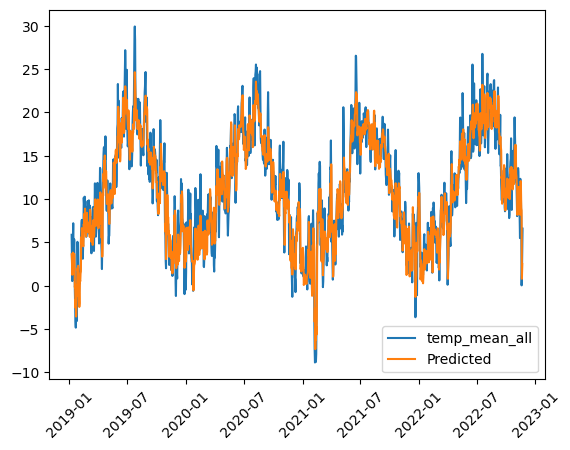

In [24]:
plt.xticks(rotation=45)
plt.plot(new_df)
plt.legend(new_df.columns)
plt.show()

### 📖Take a closer look  on the validation data
If validation_split was used in model.fit, the last data is ignored during training given by the percentage

In [25]:
#Take 
validation_data = int(len(new_df) * 0.1)
val_data = new_df[-validation_data:]
val_data = val_data.dropna()

In [26]:
val_data

,temp_mean_all,Predicted
date,,
2022-07-05,17.407639,19.708021
2022-07-06,16.262500,19.710413
2022-07-07,16.484028,18.003723
2022-07-08,17.652778,18.027313
2022-07-09,17.697917,17.339970
...,...,...
2022-11-17,9.874306,11.184060
2022-11-18,7.761111,8.931647
2022-11-19,0.038889,8.675941


In [27]:
mae = mean_absolute_error(val_data['temp_mean_all'], val_data['Predicted'])
print(f'Test MAE: {mae}')

Test MAE: 1.9386012228235368


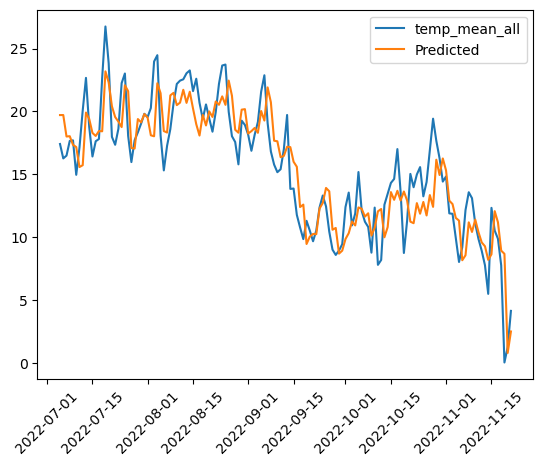

In [28]:
plt.xticks(rotation=45)
plt.plot(val_data)
plt.legend(val_data.columns)
plt.show()